In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.models import load_model
import keras.layers
import keras.optimizers
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import random

In [8]:
#Data preparation

In [9]:
Data = []
with open('../data_dim_nova.csv') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        Data.append(row)

for row in Data[2:]:
    row.pop(0)
    row[2::2] = [x / 105 for x in [float(i) for i in row[2::2]]]
    row[1::2] = [x / 68 for x in [float(i) for i in row[1::2]]]
    
for row in Data[:]:
    if row[0] == 'EA':
        row[0] = 1
    else:
        row[0] = 0

Data = Data[2:]

x = []
y = []

for i in range(0, len(Data)-2):
    x.append([Data[i]])
    y.append([Data[i+1]])
    
Data = x
target = y

In [10]:
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float)

In [11]:
data.shape

(55352, 1, 95)

In [12]:
target.shape

(55352, 1, 95)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [147]:
#RNN

In [34]:
model = Sequential()

In [35]:
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(Bidirectional(LSTM((95), batch_input_shape=(None, 1, 95), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))
model.add(TimeDistributed(Dense(95), input_shape=(1, 95)))

In [36]:
adam = keras.optimizers.adam(lr = 0.0001)

In [37]:
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy'])

In [38]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [ ]:
history = model.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test))

Train on 44281 samples, validate on 11071 samples
Epoch 1/600
44281/44281 [==============================] - 38s 866us/step - loss: 0.8397 - acc: 0.1948 - val_loss: 0.5504 - val_acc: 0.3562
Epoch 2/600
44281/44281 [==============================] - 30s 688us/step - loss: 0.5370 - acc: 0.3561 - val_loss: 0.5364 - val_acc: 0.3635
Epoch 3/600
44281/44281 [==============================] - 31s 695us/step - loss: 0.5320 - acc: 0.3612 - val_loss: 0.5348 - val_acc: 0.3649
Epoch 4/600
44281/44281 [==============================] - 31s 693us/step - loss: 0.5306 - acc: 0.3614 - val_loss: 0.5332 - val_acc: 0.3667
Epoch 5/600
44281/44281 [==============================] - 29s 665us/step - loss: 0.5296 - acc: 0.3610 - val_loss: 0.5330 - val_acc: 0.3653
Epoch 6/600
44281/44281 [==============================] - 29s 664us/step - loss: 0.5286 - acc: 0.3619 - val_loss: 0.5325 - val_acc: 0.3649
Epoch 7/600
44281/44281 [==============================] - 29s 666us/step - loss: 0.5281 - acc: 0.3604 - val_l

44281/44281 [==============================] - 27s 608us/step - loss: 0.3216 - acc: 0.6914 - val_loss: 0.3221 - val_acc: 0.6948
Epoch 60/600
44281/44281 [==============================] - 27s 609us/step - loss: 0.3205 - acc: 0.6940 - val_loss: 0.3218 - val_acc: 0.6998
Epoch 61/600
44281/44281 [==============================] - 28s 628us/step - loss: 0.3199 - acc: 0.6958 - val_loss: 0.3207 - val_acc: 0.7005
Epoch 62/600
44281/44281 [==============================] - 27s 608us/step - loss: 0.3194 - acc: 0.6971 - val_loss: 0.3207 - val_acc: 0.7076
Epoch 63/600
44281/44281 [==============================] - 27s 609us/step - loss: 0.3183 - acc: 0.6986 - val_loss: 0.3188 - val_acc: 0.7095
Epoch 64/600
44281/44281 [==============================] - 27s 611us/step - loss: 0.3178 - acc: 0.6975 - val_loss: 0.3180 - val_acc: 0.7029
Epoch 65/600
44281/44281 [==============================] - 27s 607us/step - loss: 0.3164 - acc: 0.6991 - val_loss: 0.3157 - val_acc: 0.7054
Epoch 66/600
44281/44281 [

44281/44281 [==============================] - 27s 612us/step - loss: 0.2441 - acc: 0.7967 - val_loss: 0.2460 - val_acc: 0.8013
Epoch 118/600
44281/44281 [==============================] - 27s 608us/step - loss: 0.2459 - acc: 0.7937 - val_loss: 0.2449 - val_acc: 0.8037
Epoch 119/600
44281/44281 [==============================] - 27s 610us/step - loss: 0.2419 - acc: 0.7970 - val_loss: 0.2423 - val_acc: 0.8033
Epoch 120/600
44281/44281 [==============================] - 27s 613us/step - loss: 0.2430 - acc: 0.7969 - val_loss: 0.2439 - val_acc: 0.8053
Epoch 121/600
44281/44281 [==============================] - 29s 645us/step - loss: 0.2406 - acc: 0.8018 - val_loss: 0.2416 - val_acc: 0.8102
Epoch 122/600
44281/44281 [==============================] - 27s 617us/step - loss: 0.2394 - acc: 0.8015 - val_loss: 0.2388 - val_acc: 0.8088
Epoch 123/600
44281/44281 [==============================] - 27s 602us/step - loss: 0.2386 - acc: 0.7999 - val_loss: 0.2396 - val_acc: 0.8075
Epoch 124/600
44281/

44281/44281 [==============================] - 38s 849us/step - loss: 0.1861 - acc: 0.8571 - val_loss: 0.1874 - val_acc: 0.8602
Epoch 176/600
44281/44281 [==============================] - 49s 1ms/step - loss: 0.1843 - acc: 0.8605 - val_loss: 0.1861 - val_acc: 0.8575
Epoch 177/600
44281/44281 [==============================] - 50s 1ms/step - loss: 0.1817 - acc: 0.8631 - val_loss: 0.1843 - val_acc: 0.8637
Epoch 178/600
44281/44281 [==============================] - 49s 1ms/step - loss: 0.1809 - acc: 0.8634 - val_loss: 0.1831 - val_acc: 0.8693
Epoch 179/600
44281/44281 [==============================] - 45s 1ms/step - loss: 0.1798 - acc: 0.8662 - val_loss: 0.1809 - val_acc: 0.8710
Epoch 180/600
44281/44281 [==============================] - 44s 984us/step - loss: 0.1801 - acc: 0.8646 - val_loss: 0.1843 - val_acc: 0.8669
Epoch 181/600
44281/44281 [==============================] - 44s 986us/step - loss: 0.1786 - acc: 0.8667 - val_loss: 0.1791 - val_acc: 0.8697
Epoch 182/600
44281/44281 [=

44281/44281 [==============================] - 26s 598us/step - loss: 0.1449 - acc: 0.9075 - val_loss: 0.1459 - val_acc: 0.9062
Epoch 234/600
44281/44281 [==============================] - 26s 598us/step - loss: 0.1424 - acc: 0.9103 - val_loss: 0.1439 - val_acc: 0.9066
Epoch 235/600
44281/44281 [==============================] - 26s 597us/step - loss: 0.1436 - acc: 0.9086 - val_loss: 0.1454 - val_acc: 0.9056
Epoch 236/600
44281/44281 [==============================] - 27s 600us/step - loss: 0.1411 - acc: 0.9107 - val_loss: 0.1456 - val_acc: 0.9078
Epoch 237/600
44281/44281 [==============================] - 26s 598us/step - loss: 0.1407 - acc: 0.9133 - val_loss: 0.1444 - val_acc: 0.9079
Epoch 238/600
44281/44281 [==============================] - 27s 601us/step - loss: 0.1489 - acc: 0.9036 - val_loss: 0.1543 - val_acc: 0.8974
Epoch 239/600
44281/44281 [==============================] - 27s 609us/step - loss: 0.1423 - acc: 0.9078 - val_loss: 0.1458 - val_acc: 0.9077
Epoch 240/600
44281/

Epoch 291/600
44281/44281 [==============================] - 32s 718us/step - loss: 0.1183 - acc: 0.9314 - val_loss: 0.1326 - val_acc: 0.9226
Epoch 292/600
44281/44281 [==============================] - 38s 847us/step - loss: 0.1176 - acc: 0.9313 - val_loss: 0.1211 - val_acc: 0.9299
Epoch 293/600
44281/44281 [==============================] - 34s 777us/step - loss: 0.1164 - acc: 0.9336 - val_loss: 0.1203 - val_acc: 0.9262
Epoch 294/600
44281/44281 [==============================] - 35s 789us/step - loss: 0.1178 - acc: 0.9325 - val_loss: 0.1189 - val_acc: 0.9346
Epoch 295/600
44281/44281 [==============================] - 37s 828us/step - loss: 0.1153 - acc: 0.9324 - val_loss: 0.1181 - val_acc: 0.9317
Epoch 296/600
44281/44281 [==============================] - 37s 841us/step - loss: 0.1150 - acc: 0.9332 - val_loss: 0.1186 - val_acc: 0.9332
Epoch 297/600
44281/44281 [==============================] - 36s 821us/step - loss: 0.1157 - acc: 0.9320 - val_loss: 0.1197 - val_acc: 0.9286
Epoch 

Epoch 349/600
44281/44281 [==============================] - 28s 637us/step - loss: 0.1074 - acc: 0.9383 - val_loss: 0.1068 - val_acc: 0.9350
Epoch 350/600
44281/44281 [==============================] - 28s 637us/step - loss: 0.1011 - acc: 0.9434 - val_loss: 0.1052 - val_acc: 0.9368
Epoch 351/600
44281/44281 [==============================] - 32s 729us/step - loss: 0.1000 - acc: 0.9454 - val_loss: 0.1065 - val_acc: 0.9426
Epoch 352/600
44281/44281 [==============================] - 30s 667us/step - loss: 0.0986 - acc: 0.9470 - val_loss: 0.1029 - val_acc: 0.9446
Epoch 353/600
44281/44281 [==============================] - 28s 627us/step - loss: 0.0979 - acc: 0.9468 - val_loss: 0.1021 - val_acc: 0.9418
Epoch 354/600
44281/44281 [==============================] - 28s 634us/step - loss: 0.0995 - acc: 0.9454 - val_loss: 0.1019 - val_acc: 0.9455
Epoch 355/600
44281/44281 [==============================] - 28s 630us/step - loss: 0.0978 - acc: 0.9460 - val_loss: 0.0997 - val_acc: 0.9463
Epoch 

In [ ]:
#model.save('rnn_base_nova.h5')
model.save('rnn_base_nova_bem_deepzona.h5')
#model = load_model('rnn_base_nova.h5')

In [155]:
results = model.predict(x_test)

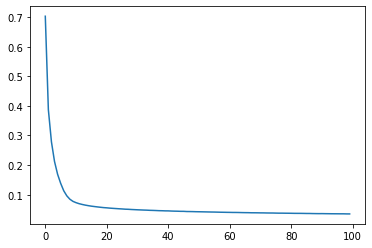

In [156]:
plt.plot(history.history['loss'])
plt.show()

In [157]:
print(results.shape)
print(y_test.shape)

(11071, 1, 95)
(11071, 1, 95)


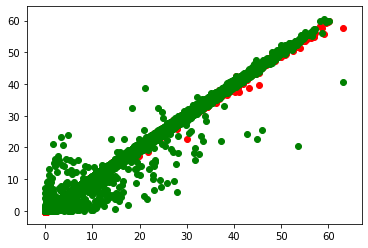

In [158]:
plt.scatter(x_test, results, c='r')
plt.scatter(x_test, y_test, c='g')
#plt.scatter(x_test, results, c='r')
plt.show()

In [18]:
#start = []
#for i in range():
#    x_rand = random.uniform(0, 1)
#    y_rand = random.uniform(0, 68/105)
#    start.append(x_rand)
#    start.append(y_rand)
    
start = data[1999]
start = np.array(start)
start = np.reshape(start, (1, 1, 95))

jogo_simulado = [start]
next_step = start
for i in range(1000):
    next_step = model.predict(next_step)
    jogo_simulado.append(next_step)

jogo_simulado = np.array(jogo_simulado)
print(jogo_simulado.shape)  
jogo_simulado = np.reshape(jogo_simulado, (1001, 95))
print(jogo_simulado.shape)  

(1001, 1, 1, 95)
(1001, 95)


In [19]:
np.savetxt('jogo_simulado.txt', jogo_simulado, delimiter=',')

In [20]:
np.min(jogo_simulado)

-6.3086323738098145